In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf

In [5]:
# Getting The Number Of ClassNames
num_of_bird_groups = len(os.listdir('test'))
num_of_bird_groups

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:jupyter\\ps\test'

In [2]:
# Getting The ClassNames
import pathlib

# data_dir = pathlib.Path('../input/100-bird-species/train')
# classnames = np.array(sorted([item.name for item in data_dir.glob('*')]))
# print(classnames)

In [ ]:
len(classnames)

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
# img=Image.open('../input/100-bird-species/test/AFRICAN CROWNED CRANE/3.jpg')
# plt.imshow(img)

In [ ]:
img1=Image.open('../input/100-bird-species/test/APOSTLEBIRD/4.jpg')
plt.imshow(img1)

In [ ]:
img2=Image.open('../input/100-bird-species/test/BARRED PUFFBIRD/3.jpg')
plt.imshow(img2)

PREPROCESSING


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir='New_train'
test_dir='New_test'
val_dir='New_valid'

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

In [7]:
train_datagen=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode='categorical',)

Found 10000 images belonging to 100 classes.


In [8]:
test_datagen=test_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode='categorical')

Found 500 images belonging to 100 classes.


In [9]:
val_datagen=val_datagen.flow_from_directory(val_dir,batch_size=32,target_size=(224,224),class_mode='categorical')

Found 500 images belonging to 100 classes.


In [10]:
data_aug=tf.keras.Sequential(
[
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomZoom(0.2),
],name='AugmentationLayer')

In [11]:
model= tf.keras.applications.InceptionV3(include_top=False)
model.trainable=False

In [12]:
inputs=tf.keras.layers.Input(shape=(224,224,3))
x=data_aug(inputs)
x=model(x,training=False)

In [13]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)


In [14]:
outputs=tf.keras.layers.Dense(100,activation='softmax')(x)

In [15]:
final_model=tf.keras.Model(inputs,outputs)

In [16]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 100)               204900    
                                                                 
Total params: 22,007,684
Trainable params: 204,900
Non-traina

In [17]:
final_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:

h1=model.fit(train_datagen,epochs=10,validation_data=val_datagen,initial_epoch=5)
# final_model1=tf.keras.Model(inputs,outputs)
# final_model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# h2=final_model1.fit(train_datagen,epochs=20,validation_data=val_datagen,validation_steps=int(0.25*len(val_datagen)))

Epoch 6/10
313/313 [==============================] - 600s 2s/step - loss: 1.7216 - accuracy: 0.5924 - val_loss: 0.5625 - val_accuracy: 0.8360
Epoch 7/10
313/313 [==============================] - 595s 2s/step - loss: 0.8964 - accuracy: 0.7488 - val_loss: 0.6452 - val_accuracy: 0.7920
Epoch 8/10
313/313 [==============================] - 601s 2s/step - loss: 0.6379 - accuracy: 0.8164 - val_loss: 0.5009 - val_accuracy: 0.8240
Epoch 9/10
313/313 [==============================] - 625s 2s/step - loss: 0.5151 - accuracy: 0.8425 - val_loss: 0.5845 - val_accuracy: 0.8120
Epoch 10/10
313/313 [==============================] - 637s 2s/step - loss: 0.4377 - accuracy: 0.8671 - val_loss: 0.6340 - val_accuracy: 0.8040


In [15]:

model1.evaluate(test_datagen)

16/16 [==============================] - 29s 2s/step - loss: 0.2614 - accuracy: 0.9260


[0.26138836145401, 0.9259999990463257]

In [19]:
model_name = 'bird_classification_inceptionv3_100_classses_v1.h5'
final_model.save(model_name, save_format='h5')

In [40]:
def plot_loss_curves(history):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))
    plt.plot(epochs, loss, label='TRAINING_LOSS')
    plt.plot(epochs, val_loss, label='VAL_LOSS')
    plt.title('LOSS')
    plt.xlabel('EPOCHS')
    plt.legend()
    plt.figure()
    plt.plot(epochs, accuracy, label='TRAINING_ACCURACY')
    plt.plot(epochs, val_accuracy, label='VAL_ACCURACY')
    plt.title('ACCURACY')
    plt.xlabel('EPOCHS')
    plt.legend()

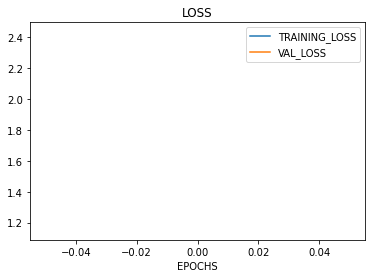

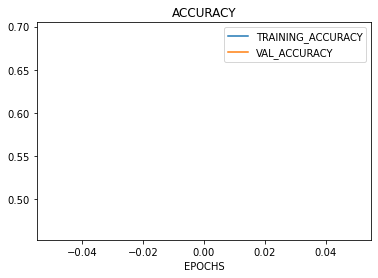

In [41]:
plot_loss_curves(h1)

In [46]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [47]:
final_model1=tf.keras.Model(inputs,outputs)
final_model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
h2=final_model1.fit(train_datagen,epochs=20,validation_data=val_datagen,validation_steps=int(0.25*len(val_datagen)),callbacks=[callback])

Epoch 1/20


KeyboardInterrupt: 

In [ ]:
final_model1.evaluate(test_datagen)

In [ ]:
plot_loss_curves(h2)

In [44]:
from tensorflow.keras.preprocessing import image

In [93]:
class_map = train_datagen.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)
    print(key)
train_datagen.class_indices

ABBOTTS BABBLER
ABBOTTS BOOBY
ABYSSINIAN GROUND HORNBILL
AFRICAN CROWNED CRANE
AFRICAN EMERALD CUCKOO
AFRICAN FIREFINCH
AFRICAN OYSTER CATCHER
AFRICAN PIED HORNBILL
ALBATROSS
ALBERTS TOWHEE
ALEXANDRINE PARAKEET
ALPINE CHOUGH
ALTAMIRA YELLOWTHROAT
AMERICAN AVOCET
AMERICAN BITTERN
AMERICAN COOT
AMERICAN FLAMINGO
AMERICAN GOLDFINCH
AMERICAN KESTREL
AMERICAN PIPIT
AMERICAN REDSTART
AMERICAN WIGEON
AMETHYST WOODSTAR
ANDEAN GOOSE
ANDEAN LAPWING
ANDEAN SISKIN
ANHINGA
ANIANIAU
ANNAS HUMMINGBIRD
ANTBIRD
ANTILLEAN EUPHONIA
APAPANE
APOSTLEBIRD
ARARIPE MANAKIN
ASHY STORM PETREL
ASHY THRUSHBIRD
ASIAN CRESTED IBIS
ASIAN DOLLARD BIRD
AUCKLAND SHAQ
AUSTRAL CANASTERO
AUSTRALASIAN FIGBIRD
AVADAVAT
AZARAS SPINETAIL
AZURE BREASTED PITTA
AZURE JAY
AZURE TANAGER
AZURE TIT
BAIKAL TEAL
BALD EAGLE
BALD IBIS
BALI STARLING
BALTIMORE ORIOLE
BANANAQUIT
BAND TAILED GUAN
BANDED BROADBILL
BANDED PITA
BANDED STILT
BAR-TAILED GODWIT
BARN OWL
BARN SWALLOW
BARRED PUFFBIRD
BARROWS GOLDENEYE
BAY-BREASTED WARBLER
BEARDED BA

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'ALBATROSS': 8,
 'ALBERTS TOWHEE': 9,
 'ALEXANDRINE PARAKEET': 10,
 'ALPINE CHOUGH': 11,
 'ALTAMIRA YELLOWTHROAT': 12,
 'AMERICAN AVOCET': 13,
 'AMERICAN BITTERN': 14,
 'AMERICAN COOT': 15,
 'AMERICAN FLAMINGO': 16,
 'AMERICAN GOLDFINCH': 17,
 'AMERICAN KESTREL': 18,
 'AMERICAN PIPIT': 19,
 'AMERICAN REDSTART': 20,
 'AMERICAN WIGEON': 21,
 'AMETHYST WOODSTAR': 22,
 'ANDEAN GOOSE': 23,
 'ANDEAN LAPWING': 24,
 'ANDEAN SISKIN': 25,
 'ANHINGA': 26,
 'ANIANIAU': 27,
 'ANNAS HUMMINGBIRD': 28,
 'ANTBIRD': 29,
 'ANTILLEAN EUPHONIA': 30,
 'APAPANE': 31,
 'APOSTLEBIRD': 32,
 'ARARIPE MANAKIN': 33,
 'ASHY STORM PETREL': 34,
 'ASHY THRUSHBIRD': 35,
 'ASIAN CRESTED IBIS': 36,
 'ASIAN DOLLARD BIRD': 37,
 'AUCKLAND SHAQ': 38,
 'AUSTRAL CANASTERO': 39,
 'AUSTRALASIAN FIGBIRD': 40,
 '

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(224, 224, 3))
    img_array = image.img_to_array(img_)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.
    prediction = model.predict(img_array)
    
    index = np.argmax(prediction)
    print(prediction.shape)
    print(prediction)
    print(prediction[0][index]);
#     res=classes[index]
#     print(res)
  
    
# def predict_image(filename, model):
#     img_ = image.load_img(filename, target_size=(224,224))
#     img_array = image.img_to_array(img_)
#     img_processed = np.expand_dims(img_array, axis=0)
#     img_processed /= 255.
    
#     prediction = model.predict(img_processed)
#     print(prediction)
#     index = np.argmax(prediction[0][0][0])
#     print(index)
#   #  plt.imshow(img_array)
#   #  plt.title("prediction - {} ".format(str(classes[index]).title()),size=18,color='red')
#   #  plt.imshow(img_array)
    

In [20]:
from tensorflow.keras.models import load_model
model=load_model('bird_classification_inceptionv3_100_classses_v1.h5')
predict_image('test/ABBOTTS BOOBY/1.jpg',model)

1/1 [==============================] - 2s 2s/step
(1, 100)
[[3.23730331e-09 9.81303453e-01 7.35823733e-06 1.41376887e-07
  1.18751231e-09 1.23300993e-07 5.45479717e-10 1.47890455e-08
  1.43688958e-04 8.05583067e-09 1.19807498e-06 3.13602655e-09
  7.32960643e-08 1.71989726e-04 1.34375089e-08 3.94704269e-11
  2.13336489e-06 1.30957956e-08 5.55767432e-10 2.78125939e-10
  9.87547821e-10 2.92116020e-08 1.02180788e-08 2.32370639e-05
  5.70891281e-08 8.12986034e-09 5.29123099e-05 4.92428249e-08
  9.62968455e-11 1.29706077e-08 8.34648670e-12 2.88987678e-08
  9.14253118e-09 6.77941807e-06 3.81352443e-08 3.78686558e-08
  1.30028173e-03 5.10700060e-09 6.11597148e-04 3.92113861e-08
  7.48375228e-09 4.34910913e-10 1.37214684e-09 4.67050327e-08
  1.73167454e-08 8.86576576e-11 2.80937047e-06 3.88907129e-09
  6.37160795e-08 5.46554045e-04 1.44929904e-02 2.27690963e-10
  3.31194877e-10 1.17425408e-07 1.42393128e-08 4.06072065e-09
  5.68362566e-06 4.70283368e-09 1.15065211e-06 1.41541792e-08
  5.7823780